# EDA and Data Preprocessing
This notebook is part of the *Smart Health: Summer Research in Diabetes Prediction Using ML* project. It includes data cleaning, encoding, and visualization before modeling.

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
#Load google drive folder
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [11]:
# Load dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
# Data overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Check for missing values
df.isnull().sum()


,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [15]:
#Encode Yes/No and Male/Female to 1/0
df_encoded = df.copy()
df_encoded = df_encoded.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})
df_encoded.head()


<ipython-input-15-7b0101330b90>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


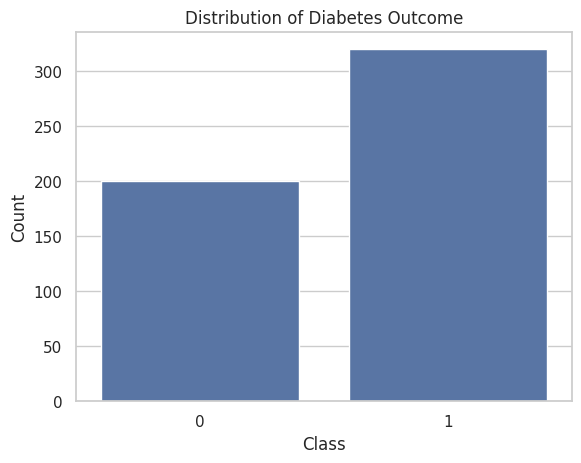

In [16]:
# Class distribution
sns.countplot(x='class', data=df_encoded)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


<ipython-input-17-013f6f778231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_encoded, palette='Set2')
<ipython-input-17-013f6f778231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_encoded, palette='Set2')
<ipython-input-17-013f6f778231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_encoded, palette='Set2')
<ipython-input-17-013f6f778231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

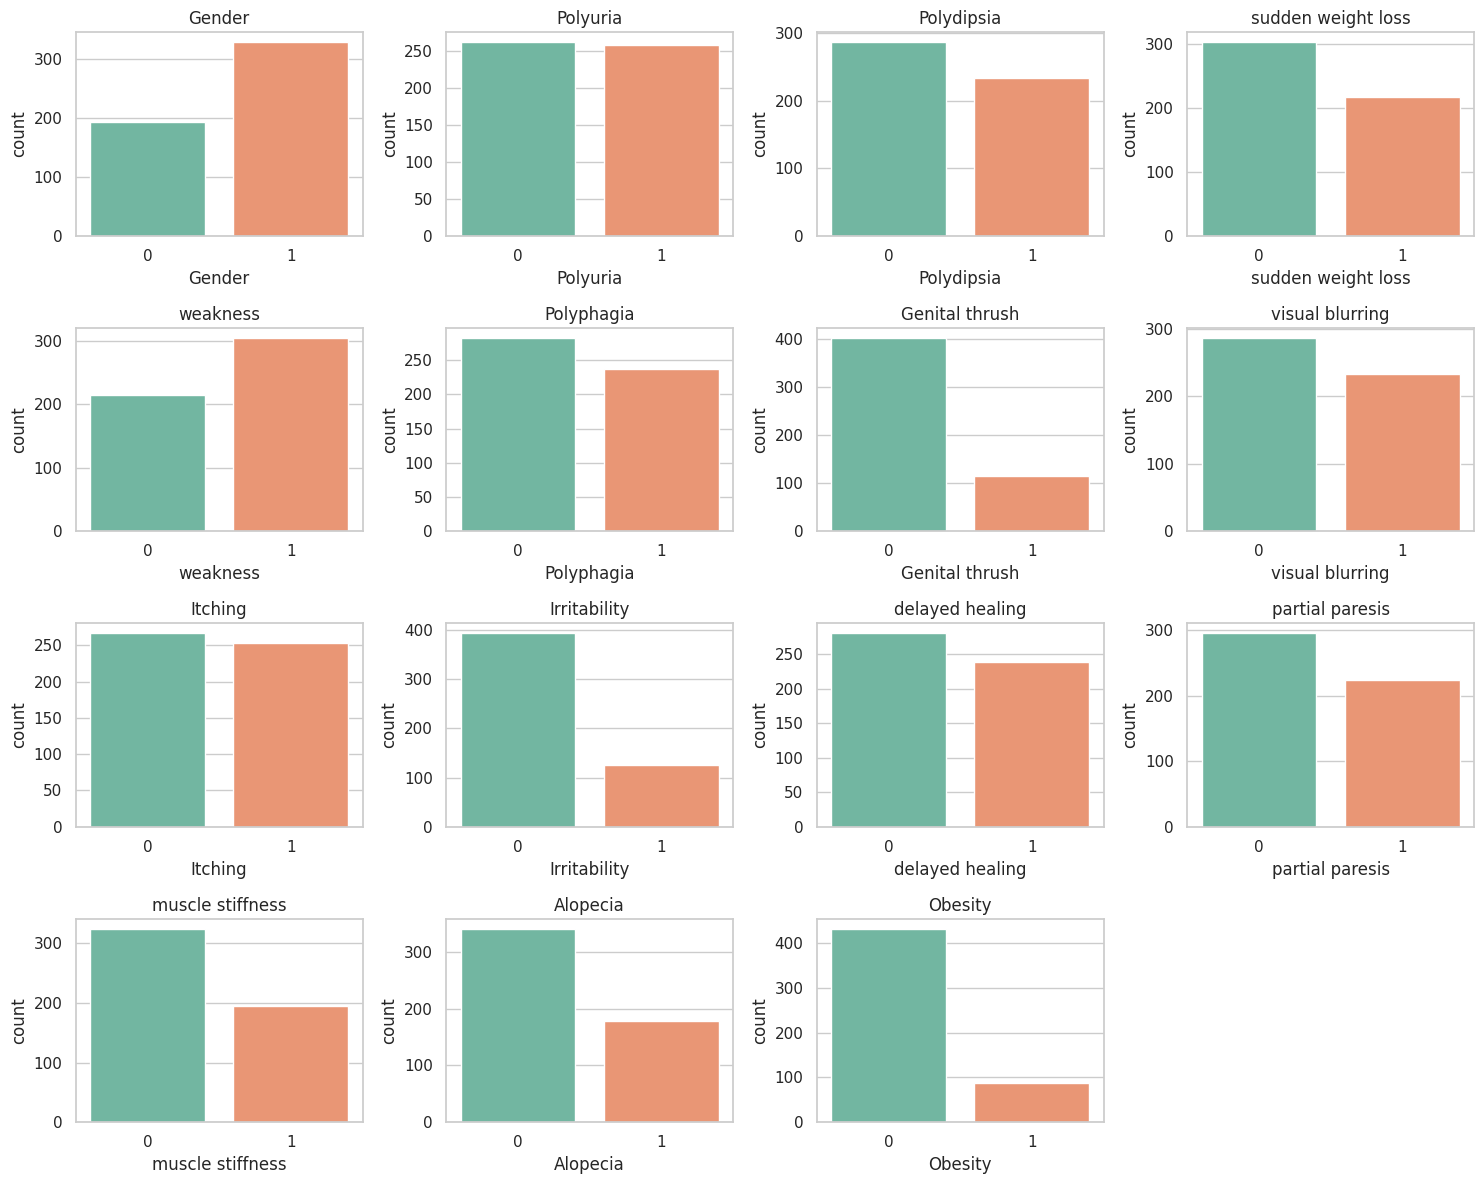

In [17]:
# Countplots for categorical features
categorical_cols = df_encoded.columns[df_encoded.nunique() == 2].tolist()
categorical_cols.remove("class")

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=col, data=df_encoded, palette='Set2')
    plt.title(col)
    plt.tight_layout()
plt.show()


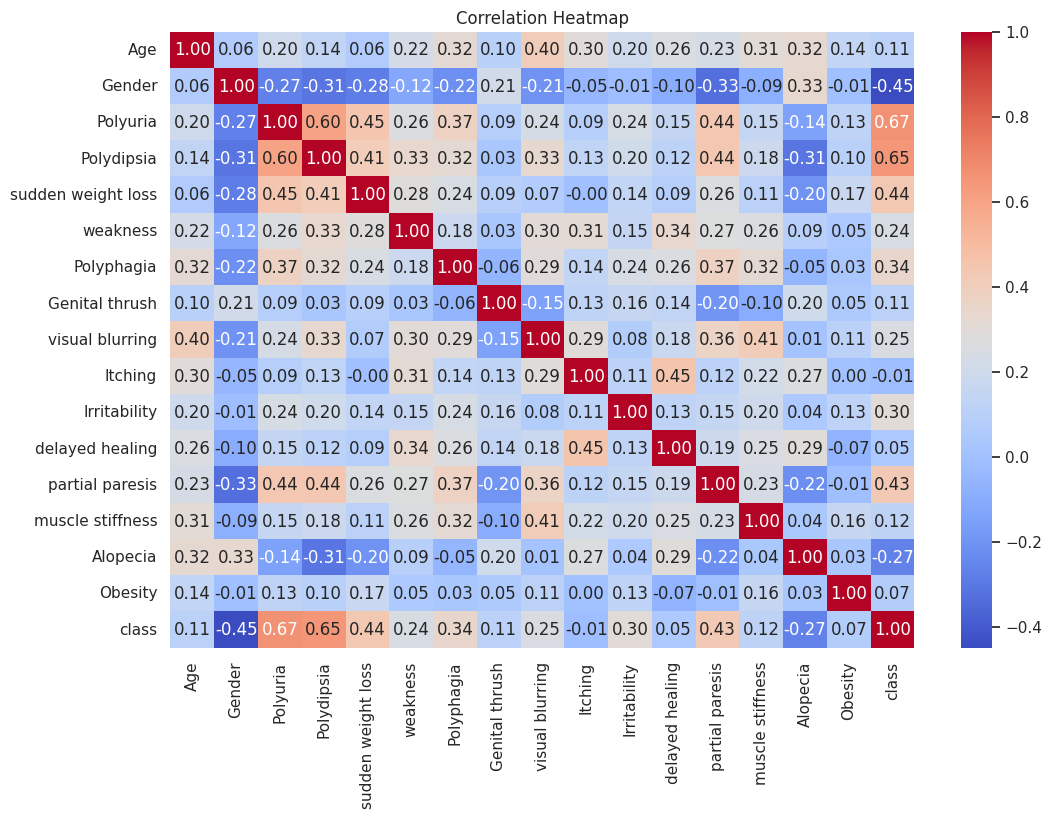

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
